In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit                        # Funktionsfit:     popt, pcov = curve_fit(func, xdata, ydata) 
from uncertainties import ufloat                            # Fehler:           fehlerwert =  ulfaot(x, err)
from uncertainties.unumpy import uarray                     # Array von Fehler: fehlerarray =  uarray(array, errarray)
from uncertainties.unumpy import (nominal_values as noms,   # Wert:             noms(fehlerwert) = x
                                  std_devs as stds)         # Abweichung:       stds(fehlerarray) = errarray
from uncertainties import unumpy as unp 
import scipy.constants as const

5.1 Wheatstonsche Brücke

In [111]:
# Wert 13
a = 1000; b = 240/760
ur2_1 = ufloat(a, 0.002*a)
ur34_1 = ufloat(b, 0.005*b)
rx_1 = ur2_1 * ur34_1

a = 500; b = 388/612
ur2_2 = ufloat(a, 0.002*a)
ur34_2 = ufloat(b, 0.005*b)
rx_2 = ur2_2 * ur34_2

rx13 = (rx_1+rx_2)/2
print(rx13)

# Wert 18
a = 1000; b = 190/810
ur2_1 = ufloat(a, 0.002*a)
ur34_1 = ufloat(b, 0.005*b)
rx_1 = ur2_1 * ur34_1

a = 500; b = 321/679
ur2_2 = ufloat(a, 0.002*a)
ur34_2 = ufloat(b, 0.005*b)
rx_2 = ur2_2 * ur34_2

rx18 = (rx_1+rx_2)/2
print(rx18)

316.4+/-1.2
235.5+/-0.9


5.2 Kapazitätsmessbrücke

In [112]:
# Wert 8
a = 225; b = 645/335; br = 1/b; c = 450
uc2 = ufloat(c, 0.002*c) 
ur2 = ufloat(a, 0.03*a)
ur34 = ufloat(b, 0.005*b)
ur43 = ufloat(br, 0.005*br)
cx8 = uc2 * ur43
rx8 = ur2 * ur34
print(cx8)
print(rx8)

233.7+/-1.3
433+/-13


5.3 Induktivitätsmessbrücke

In [113]:
# Wert 17
a = 30; b = 745/255; l = 14.6 
ul2_1 = ufloat(l, 0.002*l) 
ur2_1 = ufloat(a, 0.03*a)
ur34_1 = ufloat(b, 0.005*b)
lx17_1 = ul2_1 * ur34_1
rx17_1 = ur2_1 * ur34_1

a = 33; b = 606/396; l = 27.5 
ul2_2 = ufloat(l, 0.002*l) 
ur2_2 = ufloat(a, 0.03*a)
ur34_2 = ufloat(b, 0.005*b)
lx17_2 = ul2_2 * ur34_2
rx17_2 = ur2_2 * ur34_2

a = 42; b = 678/322; l = 20.1 
ul2_3 = ufloat(l, 0.002*l) 
ur2_3 = ufloat(a, 0.03*a)
ur34_3 = ufloat(b, 0.005*b)
lx17_3 = ul2_3 * ur34_3
rx17_3 = ur2_3 * ur34_3

lx17 = (lx17_1 + lx17_2 + lx17_3)/3
rx17 = (rx17_1 + rx17_2 + rx17_3)/3

print(lx17)
print(rx17)

42.35+/-0.13
75.5+/-1.4


5.4 Maxwell-Brücke

In [114]:
# Wert 17
r2 = 1000; r3 = 85; r4 = 960; c4 = 450
uc4_1 = ufloat(c4, 0.002*c) 
ur2_1 = ufloat(r2, 0.002*r2)
ur3_1 = ufloat(r3, 0.03*r3)
ur4_1 = ufloat(r4, 0.03*r4)
lx17_1 = ur2_1 * ur3_1 * uc4_1
rx17_1 = ur2_1 * ur3_1 / ur4_1

r2 = 1000; r3 = 60; r4 = 700; c4 = 660
uc4_2 = ufloat(c4, 0.002*c) 
ur2_2 = ufloat(r2, 0.002*r2)
ur3_2 = ufloat(r3, 0.03*r3)
ur4_2 = ufloat(r4, 0.03*r4)
lx17_2 = ur2_2 * ur3_1 * uc4_2
rx17_2 = ur2_2 * ur3_1 / ur4_2

lx17 = (lx17_1 + lx17_2)/2
rx17 = (rx17_1 + rx17_2)/2

print(lx17)
print(rx17)

(4.72+/-0.14)e+07
105+/-4


5.5 Wien-Robinson-Brücke

[2.000e+01 4.000e+01 8.000e+01 1.600e+02 2.300e+02 2.320e+02 2.340e+02
 2.360e+02 2.380e+02 2.400e+02 2.410e+02 2.420e+02 2.440e+02 2.460e+02
 2.480e+02 2.500e+02 3.200e+02 6.400e+02 1.280e+03 2.560e+03 5.020e+03
 1.004e+04 2.008e+04 3.000e+04]


(0.0, 0.36746874999999996)

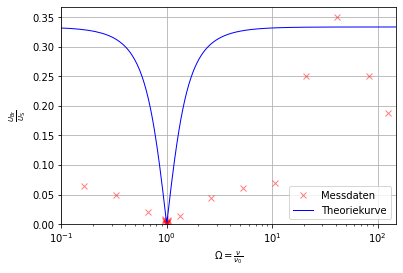

In [164]:
md = pd.read_csv('tables/e.csv')
md = md.iloc[:,[0,1]]
np.savetxt('tables/md.txt', md.values, header='nu/Hz U/mV', fmt='%.1f')

nu, Ubr = np.genfromtxt('tables/md.txt', unpack=True, skip_header=1)
Us = 4e3
nu0 = 50000/(33*2*const.pi)
Omega = nu/nu0
U = Ubr/Us

plt.plot(Omega, U, 'xr', linewidth = 1, label = 'Messdaten', alpha = 0.5)

def f(o):
    return np.sqrt( ((o**2 -1)**2) / (9 * ((1-o**2)**2) + 9*o**2)  )

xx = np.linspace(0, 150, 10000)
plt.plot(xx, f(xx), '-b', linewidth = 1, label = 'Theoriekurve')

plt.xlabel(r'$\Omega = \frac{\nu}{\nu_0}$')
plt.ylabel(r'$\frac{U_\mathrm{Br}}{U_\mathrm{S}}$')
plt.xscale('log')
plt.legend(loc="best")
plt.grid(True)

plt.xlim(0.1, 150)
plt.ylim(0)